# Data Cleaning

In [5]:
# import the libraries
import pandas as pd
from collections import Counter
import seaborn as sns
import datetime as dt
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [23]:
# We need to download all the necessary packages
# nltk.download('all') for all the packages
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shubham/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# Load the scrapped reddit csv file
data_df = pd.read_csv('./india.csv')

In [9]:
data_df

,title,url,comms_num,flair,score,id,comments,created,author,body
0,Hangpan Dada Bridge inaugurations: Arunachal C...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,[' [https://eurasiantimes.com/indian-bro-build...,1.587775e+09,AryanPandey,NaN
1,While a so called 'Journalist' cries about an ...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,[],1.587775e+09,Saap_ka_Baap,NaN
2,"High Risk Individual Categorization, Review 1 ...",https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,[],1.587774e+09,opinions_matter,NaN
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,['The best unbiased source off the top of my h...,1.587774e+09,domainusername,What are some of the reliable sources to consu...
4,Imran khan says Indian captian was scared duri...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,"['Mast hai.. Facebook pe daal.', 'Haha 😄']",1.587773e+09,knighthell87,NaN
5,Covid19 hit me. I just got fired.,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,"['F', 'If you were doing good for yourself it ...",1.587773e+09,bhootbilli,Just one call. We are having trouble with mone...
6,Astronaut Scott Kelly offers Coronavirus lockd...,https://thenewsspan.in/astronaut-scott-kelly-o...,0,Coronavirus,1,g7b05h,[],1.587773e+09,Snehashis09,NaN
7,My experience attending a protest for the firs...,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,"['Youths like you are national treasure', ""Tha...",1.587773e+09,DuckHitler,This was written by me a day after the protest...
8,6 Muslim families in Jind district convert to ...,https://timesofindia.indiatimes.com/city/chand...,1,Non-Political,0,g7avvj,[],1.587773e+09,aguyfrominternet,NaN
9,'27 Down' is one of the finest films you will ...,https://i.redd.it/kjogn67gfsu41.jpg,2,Non-Political,3,g7atrl,"[""I first came across this picture a couple of...",1.587772e+09,SilasNashh,NaN


In [11]:
# Since reddit has date in UNIX format
# We will convert it and add it to our dataframe
def getDate(created):
    return dt.datetime.fromtimestamp(created)

data_df['timestamp'] = data_df['created'].apply(getDate)

In [12]:
# Now we will check the timestamp 
data_df

,title,url,comms_num,flair,score,id,comments,created,author,body,timestamp
0,Hangpan Dada Bridge inaugurations: Arunachal C...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,[' [https://eurasiantimes.com/indian-bro-build...,1.587775e+09,AryanPandey,NaN,2020-04-25 06:04:34
1,While a so called 'Journalist' cries about an ...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,[],1.587775e+09,Saap_ka_Baap,NaN,2020-04-25 06:03:57
2,"High Risk Individual Categorization, Review 1 ...",https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,[],1.587774e+09,opinions_matter,NaN,2020-04-25 05:56:33
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,['The best unbiased source off the top of my h...,1.587774e+09,domainusername,What are some of the reliable sources to consu...,2020-04-25 05:43:11
4,Imran khan says Indian captian was scared duri...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,"['Mast hai.. Facebook pe daal.', 'Haha 😄']",1.587773e+09,knighthell87,NaN,2020-04-25 05:41:25
5,Covid19 hit me. I just got fired.,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,"['F', 'If you were doing good for yourself it ...",1.587773e+09,bhootbilli,Just one call. We are having trouble with mone...,2020-04-25 05:39:16
6,Astronaut Scott Kelly offers Coronavirus lockd...,https://thenewsspan.in/astronaut-scott-kelly-o...,0,Coronavirus,1,g7b05h,[],1.587773e+09,Snehashis09,NaN,2020-04-25 05:33:38
7,My experience attending a protest for the firs...,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,"['Youths like you are national treasure', ""Tha...",1.587773e+09,DuckHitler,This was written by me a day after the protest...,2020-04-25 05:28:28
8,6 Muslim families in Jind district convert to ...,https://timesofindia.indiatimes.com/city/chand...,1,Non-Political,0,g7avvj,[],1.587773e+09,aguyfrominternet,NaN,2020-04-25 05:27:05
9,'27 Down' is one of the finest films you will ...,https://i.redd.it/kjogn67gfsu41.jpg,2,Non-Political,3,g7atrl,"[""I first came across this picture a couple of...",1.587772e+09,SilasNashh,NaN,2020-04-25 05:23:43


# Drop unwanted Items

In [13]:
data_df.dtypes

title                object
url                  object
comms_num             int64
flair                object
score                 int64
id                   object
comments             object
created             float64
author               object
body                 object
timestamp    datetime64[ns]
dtype: object

In [14]:
# We don't need "date" column as we already added timestamp
# We will use drop function of pandas
# We are droping column so set axis=1
data_df = data_df.drop(['created'], axis=1)

In [15]:
data_df.dtypes

title                object
url                  object
comms_num             int64
flair                object
score                 int64
id                   object
comments             object
author               object
body                 object
timestamp    datetime64[ns]
dtype: object

In [17]:
# Check how many null values in our dataframe
print(data_df.isnull().sum())
data_df.count()

title           0
url             0
comms_num       0
flair          55
score           0
id              0
comments        0
author         33
body         6830
timestamp       0
dtype: int64


title        9535
url          9535
comms_num    9535
flair        9480
score        9535
id           9535
comments     9535
author       9502
body         2705
timestamp    9535
dtype: int64

In [18]:
# We can see above we have many null values
# We will drop them using panda's dropna()
data_df = data_df.dropna()

In [20]:
# Now let's check whether there are any remaining null values
print(data_df.isnull().sum())
print(data_df.count())

title        0
url          0
comms_num    0
flair        0
score        0
id           0
comments     0
author       0
body         0
timestamp    0
dtype: int64
title        2683
url          2683
comms_num    2683
flair        2683
score        2683
id           2683
comments     2683
author       2683
body         2683
timestamp    2683
dtype: int64


In [21]:
# Let's check our df
data_df.head()

,title,url,comms_num,flair,score,id,comments,author,body,timestamp
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,['The best unbiased source off the top of my h...,domainusername,What are some of the reliable sources to consu...,2020-04-25 05:43:11
5,Covid19 hit me. I just got fired.,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,"['F', 'If you were doing good for yourself it ...",bhootbilli,Just one call. We are having trouble with mone...,2020-04-25 05:39:16
7,My experience attending a protest for the firs...,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,"['Youths like you are national treasure', ""Tha...",DuckHitler,This was written by me a day after the protest...,2020-04-25 05:28:28
10,Late Night Random Discussion Thread !,https://www.reddit.com/r/india/comments/g7aoab...,4,Scheduled,2,g7aoab,['This thread is for casual discussion only. *...,oxythebot,"^Beep ^Boop ^Bot, ^I ^am ^a ^bot! ^if ^any ^pr...",2020-04-25 05:15:10
13,Dr Rajkumar Appreciation Post,https://www.reddit.com/r/india/comments/g7ai96...,2,Non-Political,8,g7ai96,"[""Ohh [Annavra](https://www.youtube.com/watch?...",Difficult_Boat,On the occasion of the birthday of Dr Rajkumar...,2020-04-25 05:05:57


# Let's do some Text Preprocessing

In [24]:
# Let's clean some texts
# First we will replace some special characters
# We will use python regex
# And nltk STOPWORDS for removing commonly used word (such as “the”, “a”, “an”, “in”)
# We also lower the text
# We will use PorterStemming: The Porter stemming algorithm (or ‘Porter stemmer’) is a 
# process for removing the commoner morphological and inflexional endings from words in English.
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
REPLACE_SYMBOL = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [25]:
# Let's define the function for cleaning
def clean_data(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE.sub(' ', text)
    text = REPLACE_SYMBOL.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

# Define string function
def stringConvert(text):
    return str(text)

In [26]:
# -------------------------------------------
# Let's apply the clean_data() to our features
# I am considering following features
# This will help us later on to test our model
# --> Title
# --> Body
# --> Comments
# -----------------------------------

# Title
data_df['title'] = data_df['title'].apply(stringConvert)
data_df['title'] = data_df['title'].apply(clean_data)

# Body
data_df['body'] = data_df['body'].apply(stringConvert)
data_df['body'] = data_df['body'].apply(clean_data)

# Comments
data_df['comments'] = data_df['comments'].apply(stringConvert)
data_df['comments'] = data_df['comments'].apply(clean_data)

In [27]:
# Let's combine some features and add it to our dataframe
# This will help us getting better insights into our model
# We will use assign() method to assign 
# We will need to use join() method to insert multiple df

# Title + Body + Comments [tbc]
feature_tbc = data_df['title'] + data_df['body'] + data_df['comments']
data_df = data_df.assign(feature_tbc=feature_tbc)

In [28]:
data_df.dtypes

title                  object
url                    object
comms_num               int64
flair                  object
score                   int64
id                     object
comments               object
author                 object
body                   object
timestamp      datetime64[ns]
feature_tbc            object
dtype: object

In [29]:
# Let's combine some another features
# Title + Body + URL [tbu]
feature_tbu = data_df['title'] + data_df['body'] + data_df['url']
data_df = data_df.assign(feature_tbu=feature_tbu)

In [30]:
data_df.dtypes

title                  object
url                    object
comms_num               int64
flair                  object
score                   int64
id                     object
comments               object
author                 object
body                   object
timestamp      datetime64[ns]
feature_tbc            object
feature_tbu            object
dtype: object

In [31]:
# Let's combine some another features
# Title + Body + comments + URL [tbcu]
feature_tbcu = data_df['title'] + data_df['body'] + data_df['comments'] + data_df['url']
data_df = data_df.assign(feature_tbcu=feature_tbcu)

In [32]:
data_df.count()

title           2683
url             2683
comms_num       2683
flair           2683
score           2683
id              2683
comments        2683
author          2683
body            2683
timestamp       2683
feature_tbc     2683
feature_tbu     2683
feature_tbcu    2683
dtype: int64

In [33]:
# Let's view our dataframe
data_df.head()

,title,url,comms_num,flair,score,id,comments,author,body,timestamp,feature_tbc,feature_tbu,feature_tbcu
3,reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,best unbiased source top head india today quin...,domainusername,reliable sources consume daily news india look...,2020-04-25 05:43:11,reliable news sourcesreliable sources consume ...,reliable news sourcesreliable sources consume ...,reliable news sourcesreliable sources consume ...
5,covid19 hit got fired,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,f good wont difficult find another job gets fi...,bhootbilli,one call trouble money terminate position that...,2020-04-25 05:39:16,covid19 hit got firedone call trouble money te...,covid19 hit got firedone call trouble money te...,covid19 hit got firedone call trouble money te...
7,experience attending protest first time 17,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,youths like national treasure thank sharing np...,DuckHitler,written day protest timeline referred wayyeste...,2020-04-25 05:28:28,experience attending protest first time 17writ...,experience attending protest first time 17writ...,experience attending protest first time 17writ...
10,late night random discussion thread,https://www.reddit.com/r/india/comments/g7aoab...,4,Scheduled,2,g7aoab,thread casual discussion political meta talks ...,oxythebot,beep boop bot bot problem askaway creator,2020-04-25 05:15:10,late night random discussion threadbeep boop b...,late night random discussion threadbeep boop b...,late night random discussion threadbeep boop b...
13,dr rajkumar appreciation post,https://www.reddit.com/r/india/comments/g7ai96...,2,Non-Political,8,g7ai96,ohh annavra https wwwyoutubecom watchvyaz_aa13...,Difficult_Boat,occasion birthday dr rajkumar wanted put trivi...,2020-04-25 05:05:57,dr rajkumar appreciation postoccasion birthday...,dr rajkumar appreciation postoccasion birthday...,dr rajkumar appreciation postoccasion birthday...


In [34]:
# We have done our cleaning of data
# Now let's convert it to csv for later use
data_df.to_csv('processedIndia.csv', index=False)

# Let's Plot some Graphs and Visualize

Text(0.5,1,'Flairs Distribution')

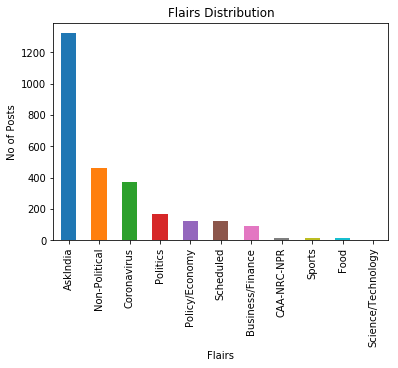

In [35]:
# Let's start with bar chart plotting each flair
# We will use matplotlib for this

data_df['flair'].value_counts().plot(kind='bar')
plt.xlabel('Flairs')
plt.ylabel('No of Posts')
plt.title('Flairs Distribution')

In [36]:
# Above Graph doen't appeal much let's use plotly
# Love Plotly
# We can interact with the graph in the jupyter itself
data_df.groupby('flair').count()['id'].iplot(kind='bar', yTitle='No of Posts', 
                                                    xTitle='Flairs',linecolor='black', title='Flairs Distribution')

In [37]:
# Let's check our flair distribution by percentage value
# I will use Plotly pie chart and we can hover over it to get the value
# We are using plotly.graph_objects which is imported as go
fig = go.Figure(data=[go.Pie(labels=data_df['flair'].unique(),
                             values=data_df.groupby('flair').count()['id'])])
fig.update_traces(hoverinfo='label+percent+value', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [39]:
# Let's do some more charts
# Don't worry Plotly got it covered :)
# We will plot distribution of Flairs based on "No of Comments"
fig = go.Figure(data=[go.Pie(labels=data_df['flair'].unique(),
                             values=data_df.groupby('comms_num').count()['id'])])
fig.update_traces(hoverinfo='label+value', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(width=0)))
fig.show()

[('https', 3373), ('wwwhotstarcom', 1672), ('india', 1448), ('would', 1172), ('movies', 1100), ('like', 1083), ('people', 1081), ('dont', 935), ('indian', 859), ('time', 843)]


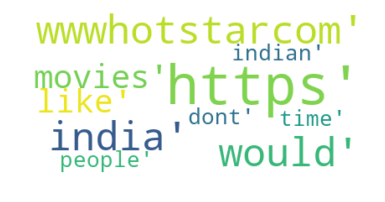

In [40]:
# Let's find out most common words in "body" column
# Most common top 10 words
commonBody = Counter(" ".join(data_df["body"]).split()).most_common(10)
print(commonBody)

# Now let's visualize it
cloud = WordCloud(max_words=10, background_color="white").generate(str(commonBody))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('dont', 5532), ('people', 5372), ('like', 4788), ('get', 4350), ('india', 4260), ('even', 3566), ('good', 3546), ('would', 3448), ('one', 3289), ('know', 3009)]


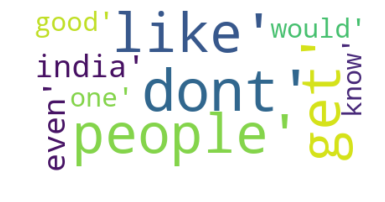

In [41]:
# Let's find out most common words in "comments" column
# Most common top 10 words
commComment = Counter(" ".join(data_df["comments"]).split()).most_common(10)
print(commComment)

# Now let's visualize it
cloud = WordCloud(max_words=10, background_color="white").generate(str(commComment))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('india', 362), ('indian', 247), ('lockdown', 243), ('help', 189), ('need', 140), ('discussion', 121), ('thread', 121), ('random', 110), ('covid19', 107), ('time', 88)]


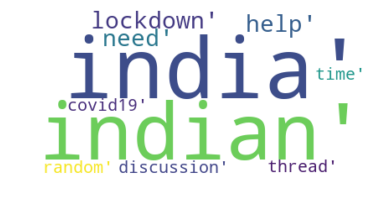

In [42]:
# Let's find out most common words in "title" column
# Most common top 10 words
commTitle = Counter(" ".join(data_df["title"]).split()).most_common(10)
print(commTitle)

# Now let's visualize it
cloud = WordCloud(max_words=10, background_color="white").generate(str(commTitle))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()